In [1]:
# Checking that the kernel is running
+(2, 2)

4

In [2]:
using Gadfly;

<hr>
<h1>Continuous random variables</h1>
<hr>

<h2>Introduction</h2>

With discrete random variable we were concerned with the probability of outcomes that came in disccrete units.  We might also want to consider the likelihood of an outcomes where such outcomes are part of a continuum of numbers.  We can no longer consider the probability of the outcomes of a discrete number of successes, but are limited to the probability of an outcome that falls between two value or at least larger than or smaller than a certain value.  With continuouis variables, no single value exists, i.e. for 0.7 I can add any number of more precise decimals (usually practically limited by the accurary of measuring apparatus).  So I can ask whether you meanst 0.707 or 0.7992 or 0.77467t43731645645634?<br/>
We construct a density function (in discrete variables we had a frequency function).  This function has the property that the total area under the curve from $-\infty$ to $\infty$ is $1$.  It is just Riemann sums (of rectangles) with the base approaching a length of $0$, so $P\left(a<X<b\right)=\int _{ a }^{ b }{ f\left( x \right) } dx$, where $X$ is the outcome we desire.  

<hr>
<h2>The cumulative distribution function</h2>

The cumulative distribution function (cdf) is the integral from $-\infty$ to a chosen value $x$, $F\left(x\right)=\int _{-\infty}^{x}{f\left(x\right)}dx$.<br/>
On a continuous interval the cdf can be expressed as $P\left(a<X<b\right)=\int _{a}^{b}{f\left(x\right)}dx=F\left(b\right)-F\left(a\right)$.

The cdf is great for calculating quatiles.  On a continuous intervals we consider a value for $x=X$ such that the area under the curve is equal to the quantile we are interested in.  To solve for this, we need the inverse of the cdf, ${F}^{-1}$.<br/>
Let's look at a cdf of $F\left(x\right)={x}^{4}$ on the interval $\left[0,1\right]$.  The median would be the 50<sup>th</sup> percentile and require a spot in the $x$-axis that will include 50% of the area under the curve from the $-\infty$ side.  If $F\left(x\right)={x}^{4}$, then ${F}^{-1}\left(y\right)={y}^{\frac{1}{4}}={0.5}^{\frac{1}{4}}$.

In [3]:
# Solving the expression above
0.5^(1/4)

0.8408964152537146

<hr>
<h2>Uniform random variables</h2>

A common example of a uniform random variable comes up in the choice of a random value between $0$ and $1$, as in random number generators in computers.  It might apppear as if each value between $0$ and $1$, inclusive, is equally likely to be chosen, but this is just because a computer has arbitary precision and cannot represent the infinite number of values on an interval.  Since we are dealing with real numbers, we note the probability of our random number being in some small subinterval of length $h$, with the probability of the random number falling in that subinterval being $h$.  This leads to a very specific density function, $f\left( x \right) =\begin{cases} 1,\quad x\in \left[ 0,1 \right]  \\ 0,\quad x\notin \left[ 0,1 \right]  \end{cases}$.<br/>
For a general interval we have the density function $f\left( x \right) =\begin{cases} \frac { 1 }{ b-a } ,\quad x\in \left[ a,b \right] ,a\neq b \\ 0,\quad x\notin \left[ a,b \right]  \end{cases}$.<br/>
This last equation makes it quite clear why we cannot calculate the probability of a specific value, since for that value $a=b$ giving rise to $\int _{ k }^{ k }{ f\left( x \right) } dx,\quad k\in \left[ a,b \right] $ for some constant $k$.

The cdf of a continuous random variable is then easy to calculate, $F\left( x \right) =\begin{cases} 0,\quad x\notin \left[ 0,1 \right]  \\ x,\quad x\in \left[ 0,1 \right]  \end{cases}$.

<hr>
<h2>Exponential density</h2>

This is a special solution to a differential equation, whcih depends on the parameter $\lambda$.<br/>
We have the function $f\left( x \right) =\begin{cases} \lambda { e }^{ -\lambda x },\quad x\ge 0 \\ 0,\quad x<0 \end{cases}$.  Depending on the value of $\lambda$, we can come up with any number of exponential densities.

Let's plot a few in Julia.

In [11]:
# Create values for 0 to 6 in increments of 0.1
xvals = collect(0:0.1:6);

In [23]:
lambda1 = exp(-xvals)
lambda5 = 10 * exp(-5 * xvals);

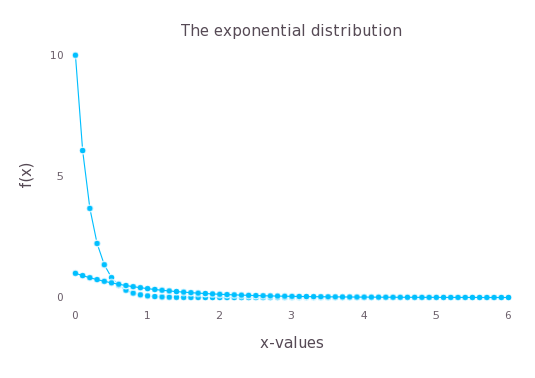

In [55]:
plot(layer(x = xvals, y = lambda1, Geom.point, Geom.line),
layer(x = xvals, y = lambda5, Geom.point, Geom.line),
Theme(grid_color = colorant"white", grid_color_focused = colorant"white"),
Guide.title("The exponential distribution"),
Guide.xlabel("x-values"),
Guide.ylabel("f(x)"))

The cdf is also easy to calculate, being $F\left( x \right) =\int _{ -\infty  }^{ x }{ f\left( x \right)  } dx\\ F\left( x \right) =\begin{cases} 1-{ e }^{ -\lambda x },\quad x\ge 0 \\ 0,\quad x<0 \end{cases}$.

<hr>
<h2>The gamma density</h2>

The equation for the gamma density is $f\left( x \right) =\frac { { \lambda  }^{ \alpha  } }{ \Gamma \left( \alpha \right)  } { x }^{ \alpha -1 }{ e }^{ -\lambda x }$, with the gamma function being $\Gamma \left( x \right) =\int _{ 0 }^{ \infty  }{ { v }^{ x-1 }{ e }^{ -v } } dv,\quad x>0$.<br/>
So, we actually start with the exponential density, but we have these $\alpha$ terms.  The $\alpha$ value is the *shape parameter* and of it equals $1$, then we have the exponential identity.  The $\lambda$ value is the *scale parameter*.

Let's keep $\lambda=1$, but plot two curves, with $\alpha = 2, \quad \alpha = 10$.

In [51]:
a2 = []
for i in collect(0:0.2:20)
    push!(a2, 1 / gamma(2) * i * exp(-i))
end

a10 = []
for i in collect(0:0.2:20)
    push!(a10, 1 / gamma(10) * i^9 * exp(-i))
end

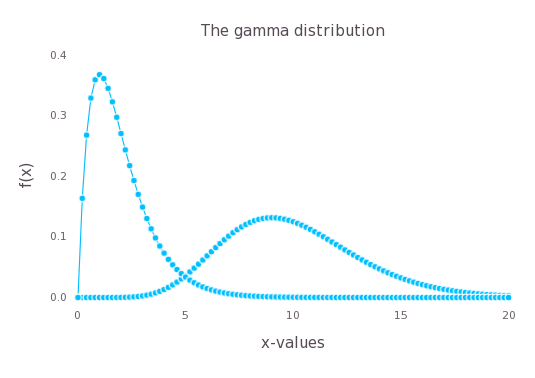

In [54]:
plot(layer(x = collect(0:0.2:20), y = a2, Geom.point, Geom.line),
layer(x = collect(0:0.2:20), y = a10, Geom.point, Geom.line),
Theme(grid_color = colorant"white", grid_color_focused = colorant"white"),
Guide.title("The gamma distribution"),
Guide.xlabel("x-values"),
Guide.ylabel("f(x)"))

<hr>
<h2>The normal distribution</h2>

The equation is $f\left( x \right)=\frac { 1 }{ \sigma \sqrt { 2\pi  }  } { e }^{ \frac { -{ \left( x-\mu  \right)  }^{ 2 } }{ 2{ \sigma  }^{ 2 } }  }$, where $\mu$ is the mean and $\sigma$ is the standard deviation.  With a mean of $0$ and a standard deviation of $1$ we talk about the standard normal distribution.<br/>
The normal distribution is bell-shaped and forms part of the great majority of statistical analysis.  A central interval of values occur most commonly and the the further an intervals of values are from that, the progressively more rare their occurrences become.

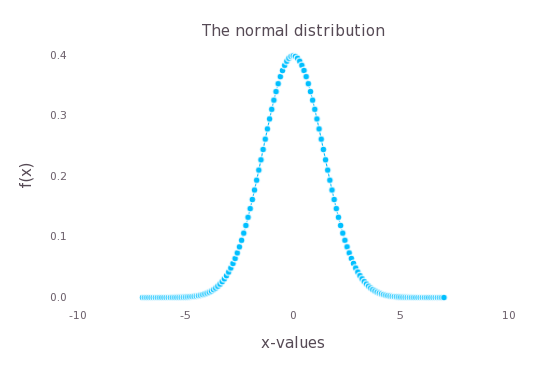

In [60]:
# Plotting the standard normal distribution
snd = [] # Creating an empty array

# Creating a for loop, populating the array
for i in collect(-7:0.1:7) # Iterating through values from -7 to 7 in intervals of 0.1
    push!(snd, 1 / sqrt(2pi) * exp(-(i-0)^2 / (2^2))) # Add the calculated value to the array
end

plot(x = collect(-7:0.1:7), y = snd, Geom.point, Geom.line,
Theme(grid_color = colorant"white", grid_color_focused = colorant"white"),
Guide.title("The normal distribution"),
Guide.xlabel("x-values"),
Guide.ylabel("f(x)"))